<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Activity_Runge_Kutta_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Last time: Euler's method

Last class we started to deal with first order differential equations.  In the general form, we can express these equations in this form:

$\frac{dx}{dt} = f\left(x,t\right)$

If $x$ is the position of an object and $t$ is time (a common scenario in physics) what this equation says is the velocity of the object is some function of the position and time.  Given this, we typically want to know where our object is as a function of time (that is, we want to find $x\left(t\right)$). 

Although for some special circumstances we can come up with closed form solutions to this equation, if $f\left(x,t\right)$ is even moderately complex that will be difficult or impossible to do.  

Of course, we can use computational techniques to solve this problem.  This requires an iterative approach, where if we know the position of our system at an initial time, we use that and our knowledge of $f\left(x,t\right)$ to find the position a small time later, which we then use for finding the position a small time after that, etc.  To formalize this idea, we say the *boundary condition* is the position at our time $t_0$, which we denote as:

$x_0 = x\left(t_0\right)$

We then move our system forward by a small step forward in time, which we denote as $h$ and call a *timestep*.  That is, the time after one timestep is:

$t_1 = t_0 + h$

In general, the time after $n$ timesteps is:

$t_n = t_0 + n \cdot h$

The tricky part is finding the position at some time after our initial time.  Last time we used Euler's method to do this.  In Euler's method, we find the position after one timestep by:


$x\left(t_0+h\right) \approx x\left(t_0\right) + h f\left(x_0,t_0\right)$

And in general we find that the position can be found as:

$x\left(t+h\right) \approx x\left(t\right) + h f\left(x,t\right)$

Make sure you understand what this equation is saying in words.  I would phrase it as "To find the position at a time $h$ in the future, I take my current position and add to it my current velocity (which is $f\left(x,t\right)$) and multiply it by the amount of time I'm stepping forward ($h$)".

One approach to coding this would be:

```
N = int((end-start)/h) +1 #determine how many points I need/. I'm adding 1 to make sure I get both the start and end times
xpoints = np.zeros(N) #define an array for my x values.  Initially set everything to 0.
tpoints = np.zeros(N) #define an array for my time values.  Initially set everything to 0.
xpoints[0] = x_0 #set our initial condition 
tpoints[0] = t_0 #set our initial condition 
for n in range(N-1):
  tpoints[n+1] = h * (n+1)
  xpoints[n+1] = xpoints[n] + h*f(xpoints[n],tpoints[n])
plt.plot(tpoints,xpoints)
plt.show()
```
Where we would have initially defined a python function ```f(x,t)``` and a set of initial conditions, ```x_0``` and ```t_0``` along with a timestep of ```h```.  A total of ```N``` timesteps are performed, and the results of the time and position calculations are stored in two arrays, ```tpoints``` and ```xpooints```.

**Be sure you understand how the above code works!  If you don't, make sure to ask!**


#Limitations of Euler's method

While Euler's method is simple, it’s not highly accurate.  To see the problem, remember that in our derivation of Euler's method we said that we could start with the Taylor series of our position $x$ to find its position at a time $t+h$:

$x\left(t+h\right) = x\left(t\right) + h \frac{dx}{dt}+\frac{1}{2}h^2\frac{d^2x}{dt^2}+.... $

Euler's method is just truncating this series after the first two terms:

$x\left(t+h\right) \approx x\left(t\right) + h f\left(x,t\right)$

The amount of error is therefore proportional to the third term, $\frac{1}{2}h^2\frac{d^2x}{dt^2}$.  So we can reduce the error by making the step size smaller, and since this term is proportional to the step size squared we say the error is of order $h^2$ (which is often written as $O\left(h^2\right)$).  If we want to make our calculations more accurate, we can reduce our step size.  For example, if we reduce our step size by a factor of 2, our error should go down by a factor of 4.

Here's the problem:  That's only the error *for each step*.  If you wanted to perform a calculation for a fixed total length of time, and you reduced the step size by a factor of 2, you would also have to perform twice as many steps.  Since you would have to perform twice as many steps with half the step size, even though the error on each step would go down by a factor of four, the total error would only go down by a factor of 2 since the errors in each step would add together.  While that’s not terrible, its not highly efficient.  It means if we want a result that is 10 times as accurate, we'd have to do 10 times the work. 

In theory, you might make Euler's method more accurate by just using more terms in the Taylor series.  The problem is that you may not know, or there may not exist, a way to calculate them. For example, the next term in the Taylor series is the acceleration of the object, $\frac{d^2x}{dt^2}$.  However, if you don't have a way to calculate this term (which you often don't) then you can't take this approach.  

#Runge-Kutta Methods

To get a graphical idea of the problem with Euler's method, consider the figure below.  In Euler's method we are taking the slope at time $t$ and using it to estimate where we are at time $t+h$.  That's ok if the slope is constant, but if it isn't then you will overshoot (as in the figure below) or undershoot the correct solution.  This is the source of the error discussed above.

Oftentimes, a better approach is to use the slope at an intermediate time.  For example, in the figure below if you pick the slope at a time halfway between the times $t$ and $t+h$ and use that to extrapolate your position at time $t+h$ you get a much better result than in Euler's method.  This is the general idea behind the second order Runge-Kutta method.

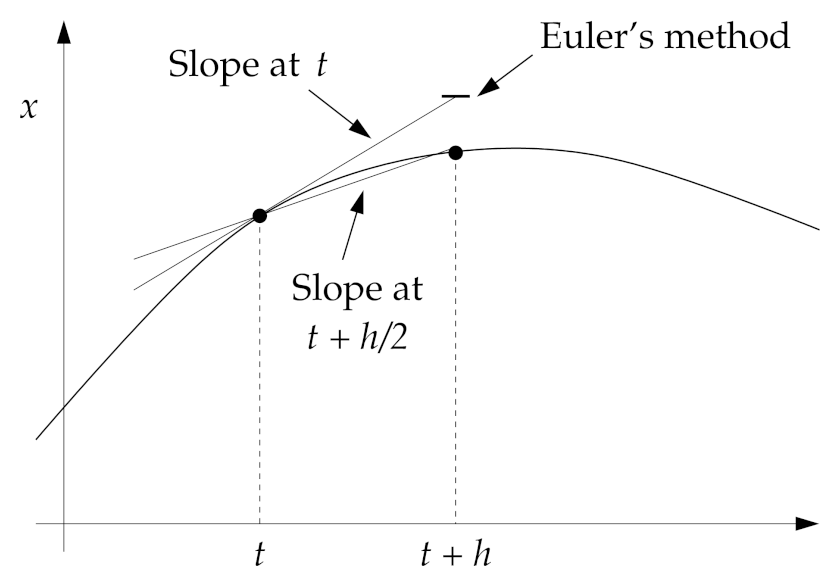

## Derivation of Second Order Runge-Kutta method (optional)

Here, we'll derive the second order Runge-Kutta method for those that are interested.  The derivation involves taking two Taylor series, both around the time point $t + \frac{1}{2}h$.  The first is forward in time and gives us the value of $x\left(t+h\right)$:

$x\left(t+h\right) = x\left(t+ \frac{h}{2}\right) + \frac{h}{2} \left(\frac{dx}{dt}\right)_{t+\frac{h}{2}}+\frac{h^2}{8}\left(\frac{d^2x}{dt^2}\right)_{t+\frac{h}{2}}+.... $

and the second involves going backwards to get $x\left(t\right)$:

$x\left(t-h\right) = x\left(t\right) + \frac{h}{2} \left(\frac{dx}{dt}\right)_{t+\frac{h}{2}}+\frac{h^2}{8}\left(\frac{d^2x}{dt^2}\right)_{t+\frac{h}{2}}+.... $


if you subtract the second equation from the first and rearrange you get:

$x\left(t+h\right) = x\left(t \right) +h \left(\frac{dx}{dt}\right)_{t+\frac{h}{2}} $



Taken with our original ODE equation this gives:

$x\left(t+h\right) = x\left(t \right) +h f\left(x\left(t+ \frac{h}{2}\right),t+ \frac{h}{2}\right) $.

Note two things:  
1.  In mathematical form this is exactly what we were looking for from above: we are finding the position at time $t+h$ from the position at time $t$ and the velocity at time $t+\frac{h}{2}$.
2.  When we subtracted the two Taylor series, the terms that had an $h^2$ disappeared.  If we had written more terms in our Taylor series, then the next term that would appear would be proportional to $h^3$.  Following our arguments from above about the error in Euler's method, this means that the error in each step scales by $h^3$.  Since the number of steps scales by $1/h$, if you are calculating your ODE for a fixed period of time, then reducing the step size by a factor of 10 will reduce your total error by a factor of 100 (whereas with Euler's method if you reduce your step size by a factor of 10 you will only reduce your error by a factor of 10).

## Implementation of the Second Order Runge-Kutta method

If we want to calculate the velocity at time $t+\frac{h}{2}$, the only problem is that we don't know the position at this time to calculate  $f\left(x\left(t+ \frac{h}{2}\right),t+ \frac{h}{2}\right)$.  To get around this, we use Euler's method to estimate $x\left(t+ \frac{h}{2}\right)$, which we then use for calculating $f\left(x\left(t+ \frac{h}{2}\right),t+ \frac{h}{2}\right)$.  In general, the algorithm **at each timestep** is therefore:

1.  Use Euler's method to compute the change in position over the timestep and store it as $k_1$: 
>$k_1 = h f\left(x\left(t\right),t\right)$

2. Use $k_1$ to estimate the velocity at the time $t+\frac{1}{2}h$.  Store this values times $h$  as $k_2$:
>$k_2 = h f\left(x\left(t\right)+\frac{1}{2}k_1,t+\frac{1}{2}h\right)$

3.  Update your position for the next iteration using $k_2$:
>$x\left(t+h\right) = x\left(t\right) + k_2$

Note that this is only slightly more complicated than the Euler method (in fact, the Euler method is really just using $k_1$ in place of $k_2$ in the third step, which lets you skip step 2 above).  

**Activity:** Modify code from last class to solve the ODE:

$\frac{dx}{dt} = x \cdot \left(\sin t\right)^2$

with an initial condition of $x=1.0$ at $t=0$.  Solve this for the time $t=0$ to $t = 10$ using both Euler's method and the second-order Runge-Kutta method. Use timesteps of $h = 0.0001, 0.001, 0.01, 0.1, 1.0$ and compare the results.  The exact answer is around 118.  How much more accurate does the Runge-Kutta method appear to be?  What sort of timestep would you need with Euler's method to get the accuracy you get for the Runge-Kutta method with a timestep of $h=0.1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Set your user defined variables for the initial conditions as well as the start and end time and the timestep (which I'm going to do in an array here to test all of these values). I'm also adding the exact answer, which will be useful for error calculations later.

In [2]:
start =  0.0
end   = 10.0
x_0   =  1.0
t_0   =  0.0
dt    = np.array([0.0001, 0.001, 0.01, 0.1, 1.0])
exact_answer = 118.127398

Define our function f(x,t) and a function for the percent error

In [3]:
def f(x,t):
  return x*np.sin(t)**2

def percent_error(x):
  return np.abs(x-exact_answer)/exact_answer * 100

Here I'm going to do this in a loop over the timesteps so that I can compare the results.

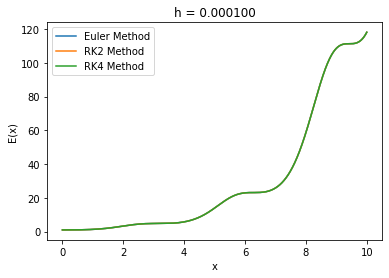

For a timestep of 0.0001, the Euler method calculates x(10.00) = 118.104715. The percent error is: 0.019202 
For a timestep of 0.0001, the 2nd order RK method calculates x(10.00) = 118.127398. The percent error is: 0.000000 
For a timestep of 0.0001, the 4th order RK method calculates x(10.00) = 118.127398. The percent error is: 0.000000 


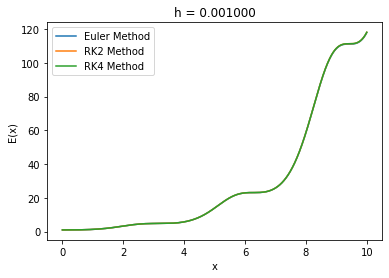

For a timestep of 0.0010, the Euler method calculates x(10.00) = 117.900879. The percent error is: 0.191758 
For a timestep of 0.0010, the 2nd order RK method calculates x(10.00) = 118.127334. The percent error is: 0.000054 
For a timestep of 0.0010, the 4th order RK method calculates x(10.00) = 118.127398. The percent error is: 0.000000 


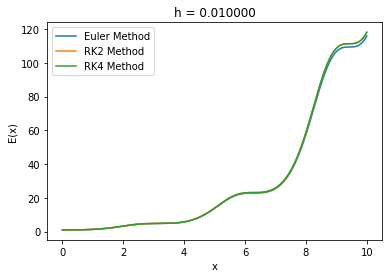

For a timestep of 0.0100, the Euler method calculates x(10.00) = 115.892847. The percent error is: 1.891645 
For a timestep of 0.0100, the 2nd order RK method calculates x(10.00) = 118.121021. The percent error is: 0.005399 
For a timestep of 0.0100, the 4th order RK method calculates x(10.00) = 118.127398. The percent error is: 0.000000 


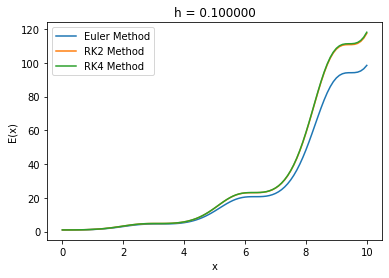

For a timestep of 0.1000, the Euler method calculates x(10.00) = 98.483730. The percent error is: 16.629223 
For a timestep of 0.1000, the 2nd order RK method calculates x(10.00) = 117.497024. The percent error is: 0.533639 
For a timestep of 0.1000, the 4th order RK method calculates x(10.00) = 118.127118. The percent error is: 0.000237 


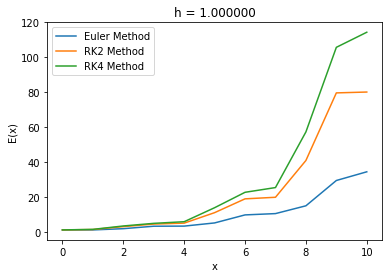

For a timestep of 1.0000, the Euler method calculates x(10.00) = 34.327126. The percent error is: 70.940589 
For a timestep of 1.0000, the 2nd order RK method calculates x(10.00) = 80.066249. The percent error is: 32.220424 
For a timestep of 1.0000, the 4th order RK method calculates x(10.00) = 114.357225. The percent error is: 3.191616 


In [4]:
for h in dt:
  #First do Euler's method:
  N = int((end-start)/h) +1 #determine how many points I need/. I'm adding 1 to make sure I get both the start and end times
  xpoints_euler = np.zeros(N) #define an array for my x values.  Initially set everything to 0.
  tpoints_euler = np.zeros(N) #define an array for my time values.  Initially set everything to 0.
  xpoints_euler[0] = x_0 #set our initial condition 
  tpoints_euler[0] = t_0 #set our initial condition (not strictly necessary in this case since t at 0 is 0, but still good to do)
  for n in range(N-1):
    tpoints_euler[n+1] = h * (n+1)
    k_1 = h*f(xpoints_euler[n],tpoints_euler[n])
    xpoints_euler[n+1] = xpoints_euler[n] + k_1
  plt.plot(tpoints_euler,xpoints_euler,label='Euler Method'%h)

  #Now repeat with the second order RK method.  Note that I'm using a couple extra variables in the for loop to make it clearer:
  xpoints_rk2 = np.zeros(N) #define an array for my x values.  Initially set everything to 0.
  tpoints_rk2 = np.zeros(N) #define an array for my time values.  Initially set everything to 0.
  xpoints_rk2[0] = x_0 #set our initial condition 
  tpoints_rk2[0] = t_0 #set our initial condition (not strictly necessary in this case since t at 0 is 0, but still good to do)
  for n in range(N-1):
    tpoints_rk2[n+1] = h * (n+1)
    x = xpoints_rk2[n]
    t = tpoints_rk2[n]
    k_1 = h*f(x,t)
    k_2 = h*f(x+ 0.5 *k_1,t+0.5*h)
    xpoints_rk2[n+1] = x + k_2
  plt.plot(tpoints_rk2,xpoints_rk2,label='RK2 Method'%h)

  #Now repeat with the fourth order RK method.  Note that I'm using a couple extra variables in the for loop to make it clearer:
  xpoints_rk4 = np.zeros(N) #define an array for my x values.  Initially set everything to 0.
  tpoints_rk4 = np.zeros(N) #define an array for my time values.  Initially set everything to 0.
  xpoints_rk4[0] = x_0 #set our initial condition 
  tpoints_rk4[0] = t_0 #set our initial condition (not strictly necessary in this case since t at 0 is 0, but still good to do)
  for n in range(N-1):
    tpoints_rk4[n+1] = h * (n+1)
    x = xpoints_rk4[n]
    t = tpoints_rk4[n]
    k_1 = h*f(x,t)
    k_2 = h*f(x+ 0.5 *k_1,t+0.5*h)
    k_3 = h*f(x+ 0.5 *k_2,t+0.5*h)
    k_4 = h*f(x+ k_3, t+h)
    xpoints_rk4[n+1] = x + (k_1+2*k_2+2*k_3+k_4)/6
  plt.plot(tpoints_rk4,xpoints_rk4,label='RK4 Method'%h)

  plt.xlabel('x')
  plt.ylabel('E(x)')
  plt.legend()
  plt.title('h = %f'%h)
  plt.show()
  print("For a timestep of %6.4f, the Euler method calculates x(%4.2f) = %f. The percent error is: %4f "%(h,end,xpoints_euler[-1],percent_error(xpoints_euler[-1])))
  print("For a timestep of %6.4f, the 2nd order RK method calculates x(%4.2f) = %f. The percent error is: %4f "%(h,end,xpoints_rk2[-1],percent_error(xpoints_rk2[-1])))
  print("For a timestep of %6.4f, the 4th order RK method calculates x(%4.2f) = %f. The percent error is: %4f "%(h,end,xpoints_rk4[-1],percent_error(xpoints_rk4[-1])))


## Fourth Order Runge-Kutta Method

In practice we can get a lot more accurate with not that much more work.  By using Taylor series around other points and appropriately  combining them, we can get higher and higher orders of accuracy using only first derivatives.  In general these strategies follow what we did above for the second order Runge-Kutta method, but their derivations are typically more complicated.

Although we can go to higher and higher orders, one of the most popular methods is the fourth order Runge-Kutta method.  Its popularity is from the fact that it's not that much harder to program then the second order method, and its single-step accuracy is $O\left(h^5\right)$, meaning its accuracy over a timescale is $O\left(h^4\right)$.  Said another way, if you decreased the timestep $h$ by a factor of 10, the accuracy of the fourth order method would go up by a factor of 10,000! (compare that to the Euler method where a factor of 10 increase would only increase your accuracy by a factor of 10).

The algorithm is similar to the second order method, only now we have to calculate four terms.  Briefly, at each step we calculate the following:

$k_1 = h \cdot f\left(x,t\right)$

$k_2 = h \cdot f\left(x + \frac{1}{2} k_1,t+ \frac{1}{2}h\right)$

$k_3 = h \cdot f\left(x + \frac{1}{2} k_2,t+ \frac{1}{2}h\right)$

$k_4 = h \cdot f\left(x + k_3,t+ h\right)$

$x\left(t+h\right) = x\left(t\right) + \frac{1}{6} \left(k_1 + 2 k_2 + 2k_3 + k_4\right)$

**Activity:** Modify your code above to also calculate the fourth order Runge-Kutta method.  How do the results compare to the second order and Euler's (aka, first-order) methods?